https://colab.research.google.com/drive/1cNYWU8OVGyysHtf9GhN98RY8QniAXF4h?usp=sharing

Github Repository

In [ ]:
!cd https://github.com/zoya4477/DATA_SCIENCE.git
!git clone
!git config--global user.email zoyahafeez785@gmail.com"
!git config--global user.name "zoya4477"

/bin/bash: line 1: cd: https://github.com/zoya4477/DATA_SCIENCE.git: No such file or directory
fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
              

Project :- 1

# Portfolio Project Walkthrough

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


Load Dataset

In [ ]:
data = pd.read_csv("/content/titanic.csv")
print(data.head())
print(data.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Data Cleaning

In [ ]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Drop irrelevant columns
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [ ]:
# Handle missing values
imputer_median = SimpleImputer(strategy="median")
data["Age"] = imputer_median.fit_transform(data[["Age"]])


In [ ]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-3644085981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


Exploratory Data Analysis(EDA)

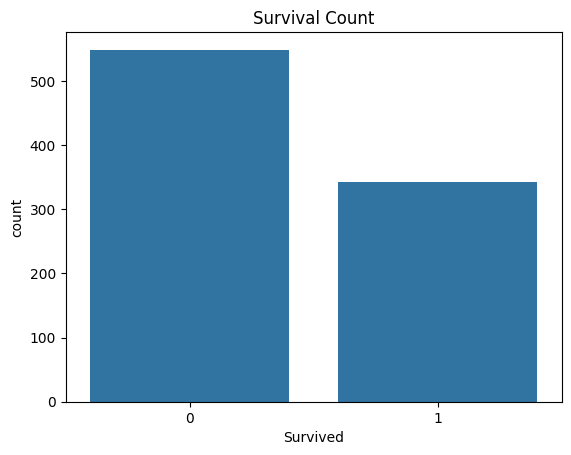

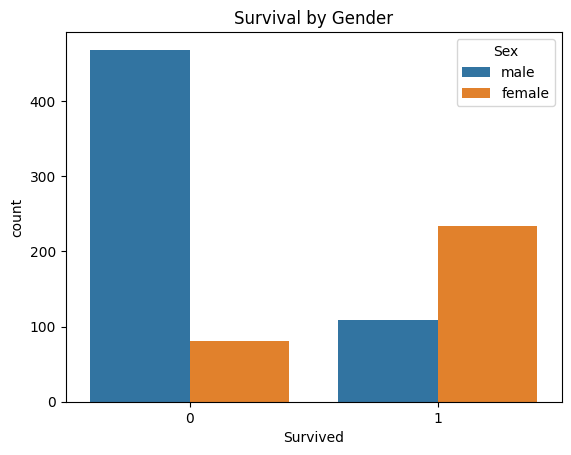

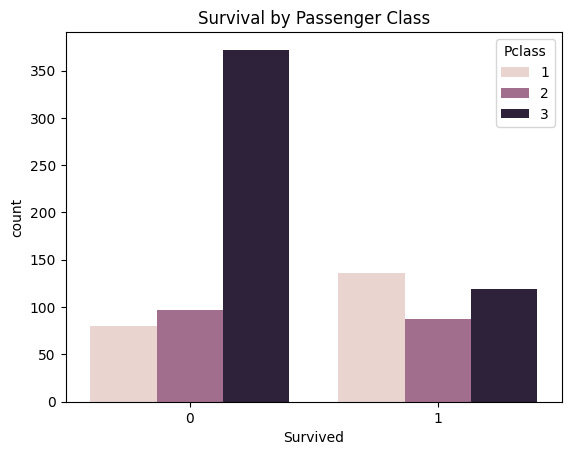

In [ ]:
# Survival count
sns.countplot(x="Survived", data=data)
plt.title("Survival Count")
plt.show()

# Survival by Gender
sns.countplot(x="Survived", hue="Sex", data=data)
plt.title("Survival by Gender")
plt.show()

# Survival by Class
sns.countplot(x="Survived", hue="Pclass", data=data)
plt.title("Survival by Passenger Class")
plt.show()


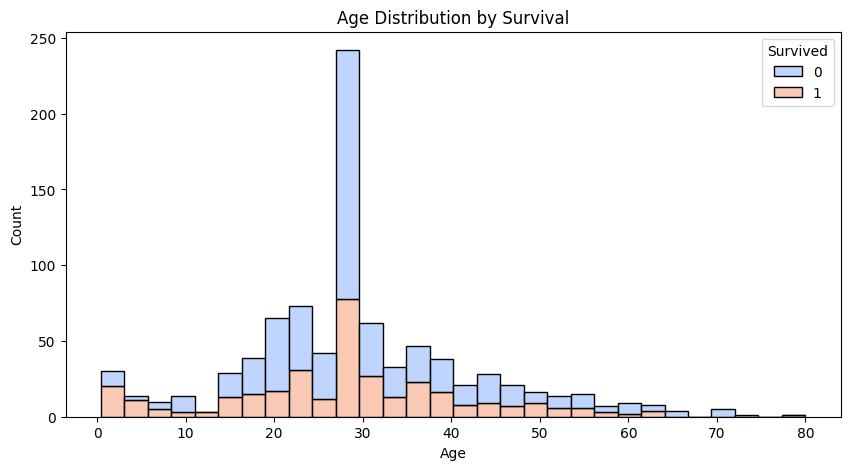

/tmp/ipython-input-2828133815.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=data, palette="Set3")


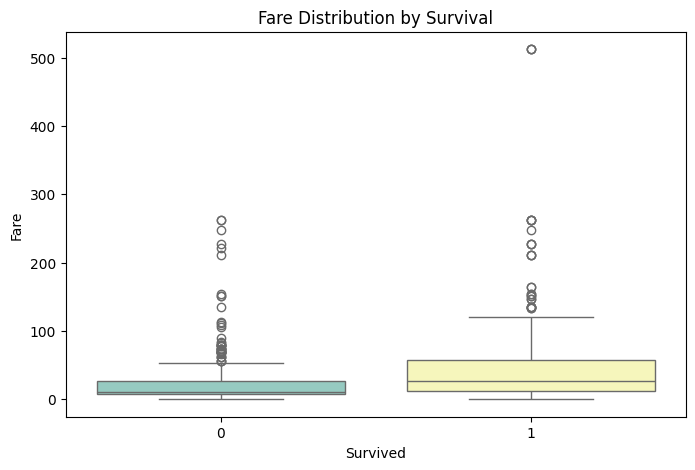

In [ ]:
#Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack", bins=30, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

#Fare Distribution
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=data, palette="Set3")
plt.title("Fare Distribution by Survival")
plt.show()



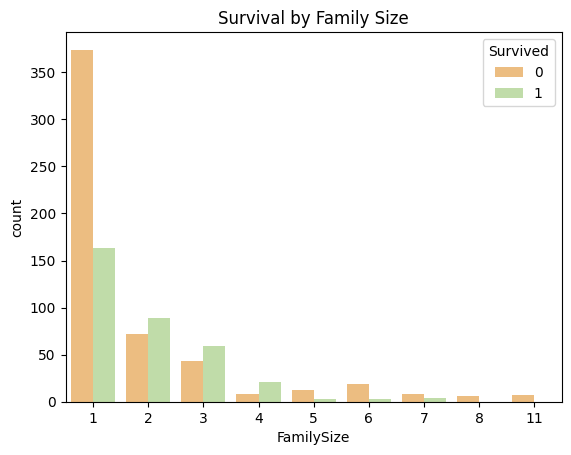

In [ ]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
sns.countplot(x="FamilySize", hue="Survived", data=data, palette="Spectral")
plt.title("Survival by Family Size")
plt.show()


Correlation Heatmap

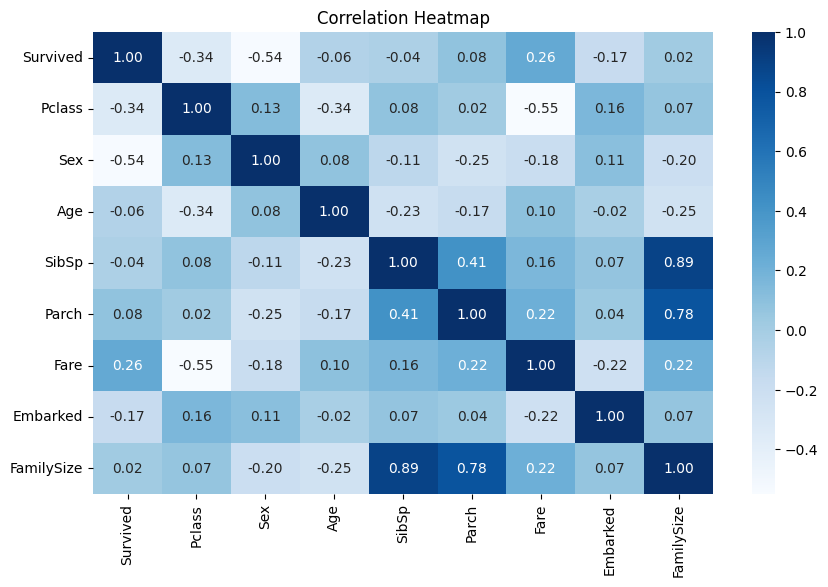

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Feature Engineering

In [ ]:
# Encode categorical columns
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])      # male=1, female=0
data["Embarked"] = le.fit_transform(data["Embarked"])

# Create Family Size feature
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

print(data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize
0         0       3    1  22.0      1      0   7.2500         2           2
1         1       1    0  38.0      1      0  71.2833         0           2
2         1       3    0  26.0      0      0   7.9250         2           1
3         1       1    0  35.0      1      0  53.1000         2           2
4         0       3    1  35.0      0      0   8.0500         2           1


Train Test Split

In [ ]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel="rbf", probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Decision Tree Results:
Accuracy: 0.7597765363128491
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.69      0.76      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.76      0.76      0.76       179


Random Forest Results:
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy     

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:14:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Model Comparison

                    Model  Accuracy
0     Logistic Regression  0.810056
1           Decision Tree  0.759777
2           Random Forest  0.810056
3     K-Nearest Neighbors  0.698324
4  Support Vector Machine  0.670391
5       Gradient Boosting  0.804469
6                 XGBoost  0.776536


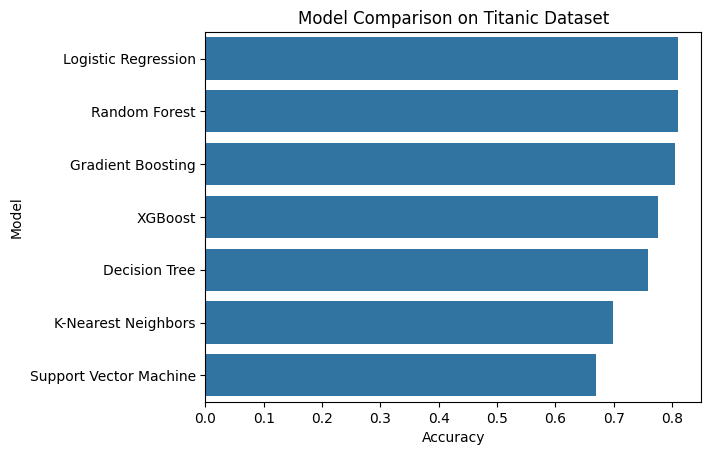

In [ ]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values(by="Accuracy", ascending=False))
plt.title("Model Comparison on Titanic Dataset")
plt.show()


Confusion Matrix for best model

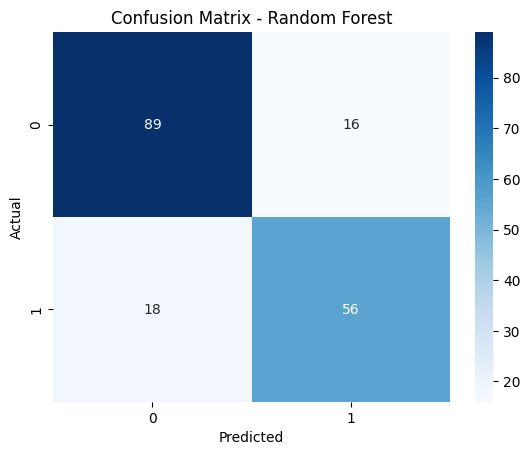

In [ ]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Final Insight

In [ ]:
print("Best Performing Model:", max(results, key=results.get))
print("Accuracy:", max(results.values()))

Best Performing Model: Logistic Regression
Accuracy: 0.8100558659217877


## Project Summary: Titanic Survival Prediction

This project aimed to build a predictive model to determine passenger survival on the Titanic. The key steps involved were:

1.  **Data Loading and Initial Exploration:** The Titanic dataset was loaded and its structure and missing values were examined.
2.  **Data Cleaning:** Irrelevant columns were dropped, and missing values in the 'Age' and 'Embarked' columns were handled using imputation.
3.  **Exploratory Data Analysis (EDA):** Visualizations were created to understand the distribution of survival and its relationship with gender and passenger class.
4.  **Feature Engineering:** New features like 'FamilySize' were created, and categorical features ('Sex' and 'Embarked') were encoded.
5.  **Model Training and Evaluation:** Several machine learning models (Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine, Gradient Boosting, and XGBoost) were trained and evaluated based on accuracy.
6.  **Model Comparison and Selection:** The models were compared, and the best-performing model (Logistic Regression and Random Forest, both with similar accuracy) was identified. A confusion matrix for the Random Forest model was visualized.

The project successfully demonstrated the process of data cleaning, feature engineering, and model building for a classification task, providing insights into factors influencing survival on the Titanic.

Project :- 2

# Covid-19 Data Analysis Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 Load the Dataset

In [ ]:
df = pd.read_csv("/content/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Data Cleaning & Preprocessing

In [ ]:
# missing values check
print(df.isnull().sum())


iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
p

In [ ]:
#Handle missing values
df = df.fillna(0)

In [ ]:
df.columns.tolist()


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [ ]:
## select only important columns
covid_data = df[['location','date','total_cases','new_cases',
                 'total_deaths','new_deaths',
                 'new_tests','total_tests',
                 'population','stringency_index']]
#convert Date column into datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])


/tmp/ipython-input-3703156446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['date'] = pd.to_datetime(covid_data['date'])


Exploratory Data Analysis(EDA)

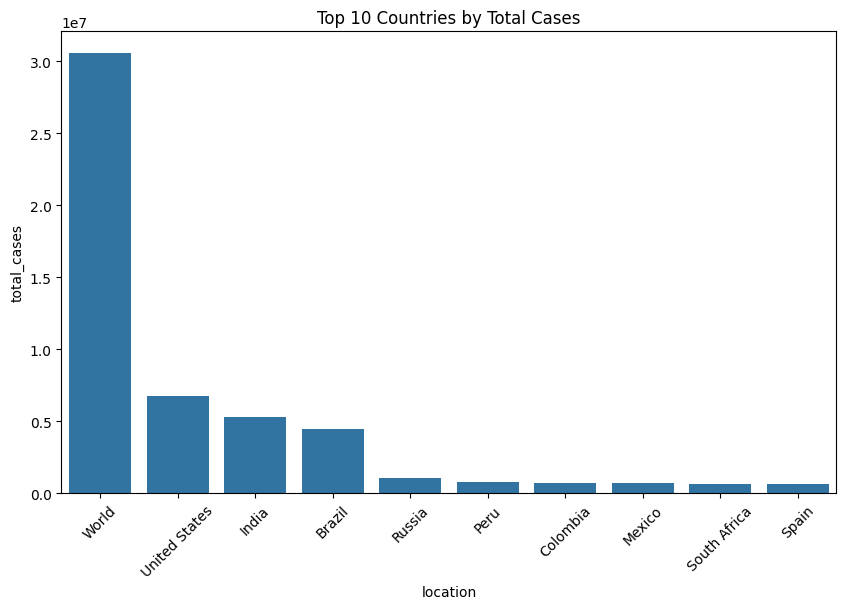

In [ ]:
#Country-wise Latest Snapshot
latest = covid_data.groupby('location').last()
top_cases = latest.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cases.index, y=top_cases['total_cases'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Total Cases")
plt.show()

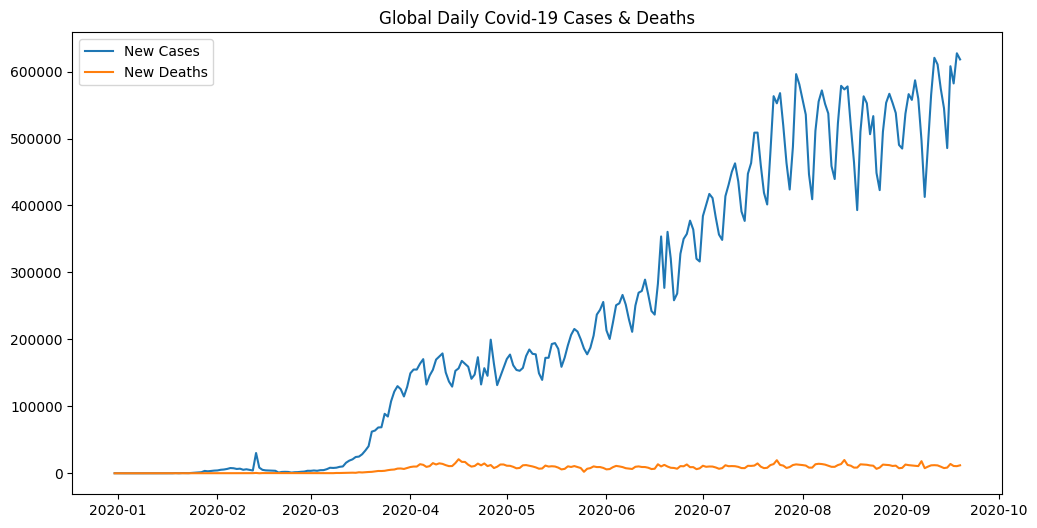

In [ ]:
#Global trend
world = covid_data.groupby('date')[['new_cases','new_deaths']].sum()

plt.figure(figsize=(12,6))
plt.plot(world.index, world['new_cases'], label="New Cases")
plt.plot(world.index, world['new_deaths'], label="New Deaths")
plt.legend()
plt.title("Global Daily Covid-19 Cases & Deaths")
plt.show()


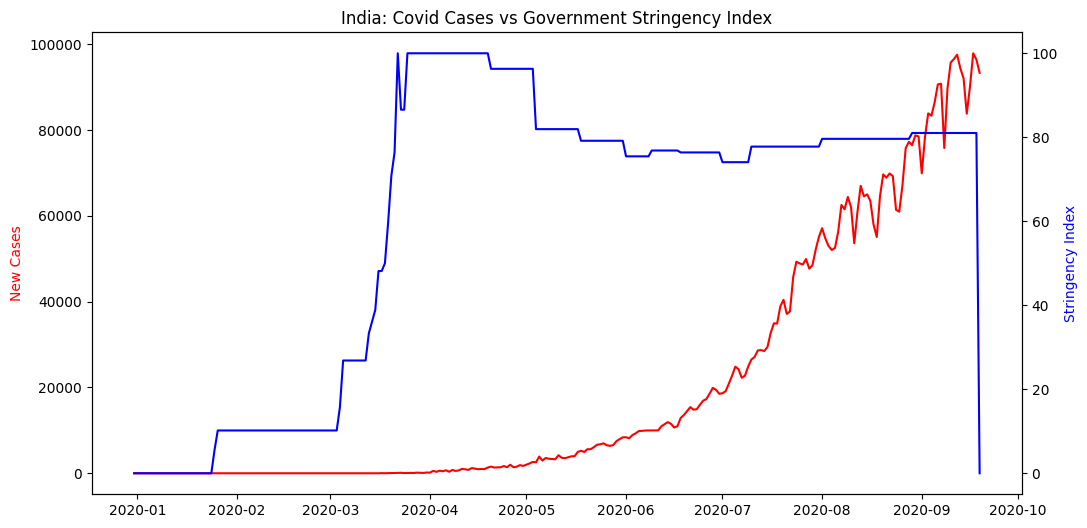

In [ ]:
#Stringency Index Impact (Lockdown Policies)
india = covid_data[covid_data['location'] == "India"]

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(india['date'], india['new_cases'], color='red', label="New Cases")
ax2 = ax1.twinx()
ax2.plot(india['date'], india['stringency_index'], color='blue', label="Stringency Index")

ax1.set_ylabel("New Cases", color="red")
ax2.set_ylabel("Stringency Index", color="blue")
plt.title("India: Covid Cases vs Government Stringency Index")
plt.show()



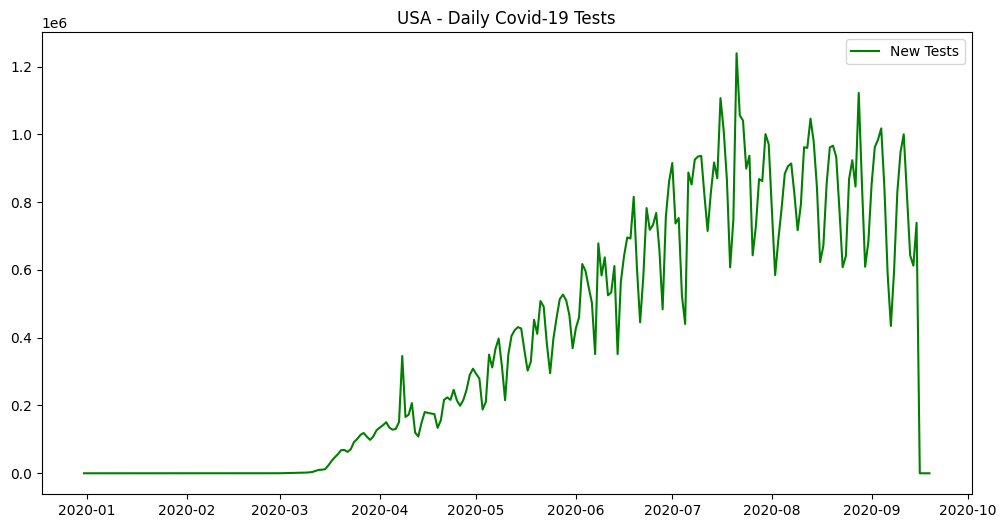

In [ ]:
#Testing Analysis
usa = covid_data[covid_data['location'] == "United States"]

plt.figure(figsize=(12,6))
plt.plot(usa['date'], usa['new_tests'], label="New Tests", color="green")
plt.title("USA - Daily Covid-19 Tests")
plt.legend()
plt.show()


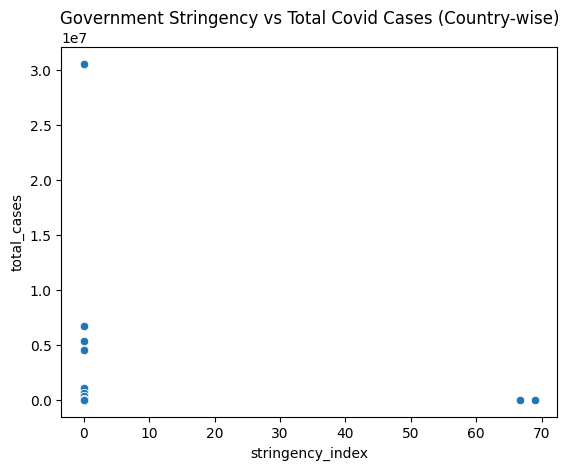

In [ ]:
#Stringency Index vs Cases
sns.scatterplot(data=latest, x='stringency_index', y='total_cases')
plt.title("Government Stringency vs Total Covid Cases (Country-wise)")
plt.show()


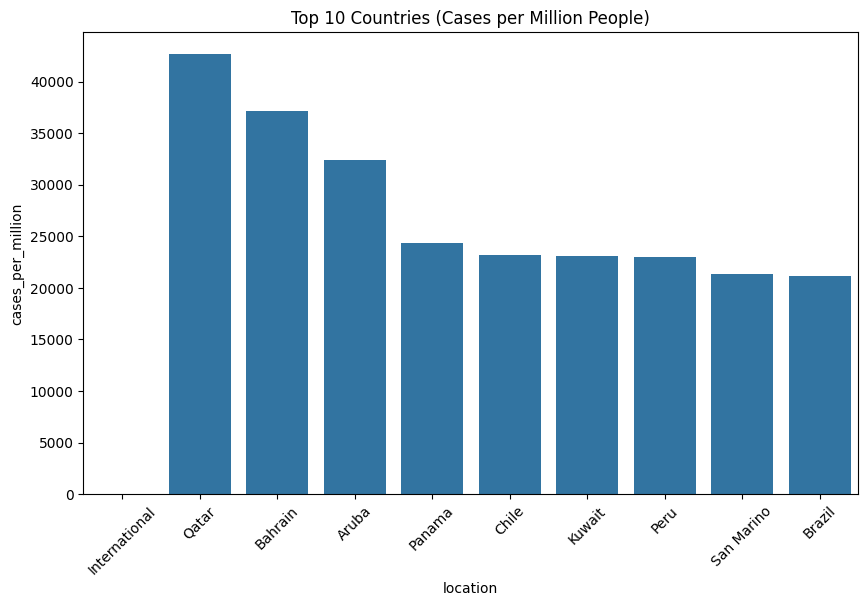

In [ ]:
#Cases per Population (Normalized)
latest['cases_per_million'] = (latest['total_cases'] / latest['population']) * 1e6

top_per_million = latest.sort_values(by='cases_per_million', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_per_million.index, y=top_per_million['cases_per_million'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries (Cases per Million People)")
plt.show()


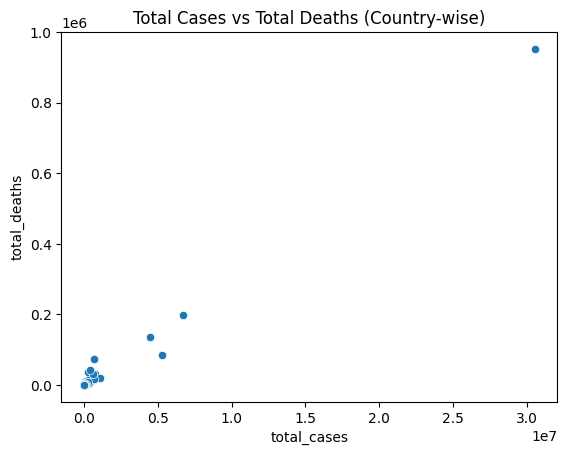

In [ ]:
#Deaths vs Cases (Severity)
sns.scatterplot(data=latest, x='total_cases', y='total_deaths')
plt.title("Total Cases vs Total Deaths (Country-wise)")
plt.show()


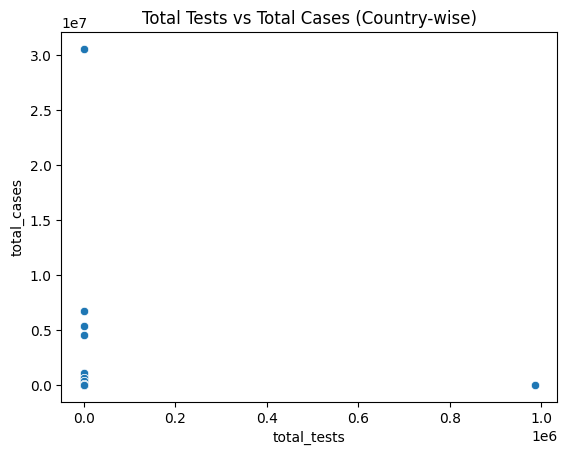

In [ ]:
#Tests vs Cases (Detection Capability)
sns.scatterplot(data=latest, x='total_tests', y='total_cases')
plt.title("Total Tests vs Total Cases (Country-wise)")
plt.show()


## Project Summary: Covid-19 Data Analysis

This project involved analyzing the Covid-19 dataset from Our World in Data to explore various aspects of the pandemic. The key steps covered were:

1.  **Data Loading and Initial Exploration:** Loaded the dataset and examined its structure and available columns.
2.  **Data Cleaning and Preprocessing:** Selected relevant columns for analysis, including vaccination data, and converted the 'date' column to datetime format. Missing values were handled by filling them with 0.
3.  **Exploratory Data Analysis (EDA):**
    *   Visualized the top 10 countries by total cases.
    *   Plotted the global daily new cases and new deaths over time.
    *   Examined the relationship between the government stringency index and new cases in India.
    *   Analyzed the daily new tests in the United States.
    *   Visualized the relationship between stringency index and total cases across countries.
    *   Calculated and visualized cases per million people for the top 10 countries.
    *   Explored the relationship between total cases and total deaths (severity).
    *   Examined the relationship between total tests and total cases (detection capability).
    *   Visualized vaccination progress (people vaccinated and fully vaccinated) in India.

This analysis provides insights into the spread of the virus, the impact of interventions, and the progress of testing and vaccination efforts across different regions and countries.

Project :- 3

# Building a YouTube Data Dashboard with Streamlit

 this project code will be given  by Github  repository